In [2]:
import networkx as nx
from math import e

distances = [(1, 2, 17),
             (1, 3, 39),
             (1, 4, 32),
             (1, 5, 28),
             (1, 6, 18),
             (2, 3, 24),
             (2, 4, 28),
             (2, 5, 35),
             (2, 6, 13),
             (3, 4, 25),
             (3, 5, 43),
             (3, 6, 23),
             (4, 5, 20),
             (4, 6, 16),
             (5, 6, 24)]

V = [1, 5, 2, 6, 3, 4, 1]

Z = [(3, 4),
     (4, 5),
     (5, 2),
     (6, 2)]

P = [78, 79, 25, 82]

T = 100

def probability(delta, T):
    return 100 * e ** (-delta / T)


def reductTemp(prevT):
    nextT = 0.5 * prevT

    return nextT

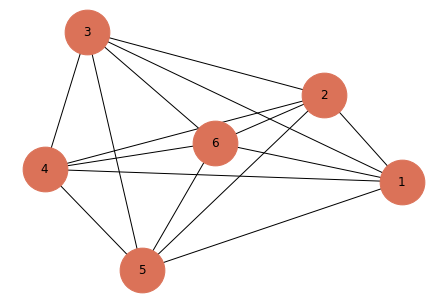

In [4]:
graph = nx.Graph()
graph.add_weighted_edges_from(distances)
nx.draw_kamada_kawai(graph, node_color='#db7258', node_size=2000, with_labels=True)

In [5]:
def edgeLength(i, j, distances, roundTrip=True):
    if roundTrip:
        return max([(item[2] if (item[0] == i and item[1] == j) or (item[1] == i and item[0] == j) else -1)
                    for item in distances])
    else:
        return max([(item[2] if (item[0] == i and item[1] == j) else -1) for item in distances])


def routeLength(V, distances):
    edges = []

    for i in range(len(V) - 1):
        edges.append(edgeLength(V[i], V[i + 1], distances))

    return sum(edges)


def routeOneReplacement(arrV, Z, replacementByName=True):
    decrement = 1 if replacementByName else 0

    arrV[Z[0] - decrement], arrV[Z[1] - decrement] = arrV[Z[1] - decrement], arrV[Z[0] - decrement]

    return arrV


def routeReplacement(V, Z):
    for z in Z:
        V = routeOneReplacement(V, z)

    return V


def chooseRoute(distances, V, Z, T, P):
    sumLength = routeLength(V, distances)
    arrSum = [sumLength]

    for i in range(len(Z)):
        newV = routeOneReplacement(V[:], Z[i])
        newS = routeLength(newV, distances)
        arrSum.append(newS)
        deltaS = newS - sumLength

        if deltaS > 0:
            p = probability(deltaS, T)

            if p > P[i]:
                V = newV
                sumLength = newS
        else:
            V = newV
            sumLength = newS

        T = reductTemp(T)

    return V, arrSum


def drawRouteGraph(distances, bestRoute):
    newDistances = []

    for i in range(len(bestRoute) - 1):
        for distance in distances:
            if distance[0] == bestRoute[i] and distance[1] == bestRoute[i + 1] or distance[1] == bestRoute[i] and \
                    distance[0] == bestRoute[i + 1]:
                newDistances.append(distance)

    graph = nx.Graph()

    graph.add_weighted_edges_from(newDistances)

    nx.draw_kamada_kawai(graph, node_color='#db7258', node_size=2000, with_labels=True)

In [6]:
bestRoute, arrLength = chooseRoute(distances, V, Z, T, P)

In [7]:
print(f'Лучший выбранный маршрут: {bestRoute}')
print(f'Длина лучшего выбранного маршрута: {routeLength(bestRoute, distances)}')
print(f'Длины всех рассмотренных маршрутов: {arrLength}')

Лучший выбранный маршрут: [1, 3, 6, 2, 5, 4, 1]
Длина лучшего выбранного маршрута: 162
Длины всех рассмотренных маршрутов: [156, 146, 159, 162, 178]


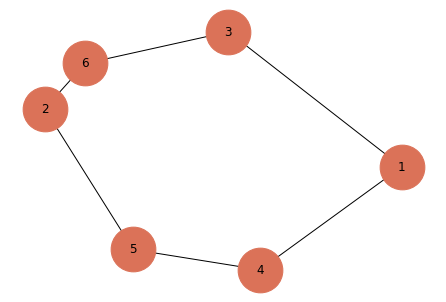

In [8]:
drawRouteGraph(distances, bestRoute)